# 1. Introduction

This section undertakes a rigorous statistical analysis of the Airbnb dataset specific to Seattle, Washington. The core objectives guiding this analysis encompass:

1. **Statistical Property Examination:**
   - Conduct a comprehensive evaluation of the statistical properties inherent in the Seattle Airbnb dataset.

2. **Variable Correlation Identification:**
   - Explore and identify correlations among various variables within the Seattle dataset.

3. **Dependent and Independent Variable Correlation:**
   - Investigate correlations between the dependent variables and the independent variables unique to the Seattle context. This exploration aims to unveil relationships that contribute to the dataset's overall dynamics.

Given the distinctive characteristics of the Seattle dataset, these analytical pursuits are essential for extracting nuanced insights into statistical nuances, inter-variable relationships, and the intricate correlations between dependent and independent variables. The findings from this analysis will play a pivotal role in informing subsequent analyses and drawing meaningful conclusions specific to the Seattle, Washington Airbnb dataset.

In [98]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, mannwhitneyu

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
#import data and preliminary preprocessing
df = pd.read_csv('/content/drive/MyDrive/DS-SB/Capstone-Two/abnb_seattle.csv')

In [101]:
df.head()

,id,scrape_id,last_scraped,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities_ private hot tub,amenities_ free parking garage on premises,amenities_ na refrigerator,amenities_ ge stainless steel oven,amenities_ i use only organic body products for my guests. they vary but i like dr. teals body soap,amenities_ 42\ tv with hbo max,amenities_ 49\ hdtv with amazon prime video,days_sincehost_since,days_sincefirst_review,days_sincelast_review
0,6606,20230918050357,2023-09-18,14942,2009-04-26,within a day,1.0,0.45,False,4,...,0,0,0,0,0,0,0,5258,5176,44
1,9419,20230918050357,2023-09-18,30559,2009-08-09,within a few hours,1.0,0.99,True,9,...,0,0,0,0,0,0,0,5153,4798,14
2,9531,20230918050357,2023-09-18,31481,2009-08-13,within a day,1.0,0.72,True,2,...,0,0,0,0,0,0,0,5149,4267,9
3,9534,20230918050357,2023-09-18,31481,2009-08-13,within a day,1.0,0.72,True,2,...,0,0,0,0,0,0,0,5149,4264,113
4,9596,20230918050357,2023-09-18,14942,2009-04-26,within a day,1.0,0.45,False,4,...,0,0,0,0,0,0,0,5258,4478,1085


In [102]:
# Remove rows with price equal to 0
df = df[df['price'] != 0].reset_index(drop=True)

reset_index(drop=True): After filtering, this part resets the index of the DataFrame. The drop=True argument is used to avoid adding a new column with the old index values. It simply resets the index to a new sequential one, making it more organized

In [103]:
df.head()

,id,scrape_id,last_scraped,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities_ private hot tub,amenities_ free parking garage on premises,amenities_ na refrigerator,amenities_ ge stainless steel oven,amenities_ i use only organic body products for my guests. they vary but i like dr. teals body soap,amenities_ 42\ tv with hbo max,amenities_ 49\ hdtv with amazon prime video,days_sincehost_since,days_sincefirst_review,days_sincelast_review
0,6606,20230918050357,2023-09-18,14942,2009-04-26,within a day,1.0,0.45,False,4,...,0,0,0,0,0,0,0,5258,5176,44
1,9419,20230918050357,2023-09-18,30559,2009-08-09,within a few hours,1.0,0.99,True,9,...,0,0,0,0,0,0,0,5153,4798,14
2,9531,20230918050357,2023-09-18,31481,2009-08-13,within a day,1.0,0.72,True,2,...,0,0,0,0,0,0,0,5149,4267,9
3,9534,20230918050357,2023-09-18,31481,2009-08-13,within a day,1.0,0.72,True,2,...,0,0,0,0,0,0,0,5149,4264,113
4,9596,20230918050357,2023-09-18,14942,2009-04-26,within a day,1.0,0.45,False,4,...,0,0,0,0,0,0,0,5258,4478,1085


In [104]:

# Remove rows with price = 0
df = df[df['price'] != 0].reset_index(drop=True)


In [105]:
df.head()

,id,scrape_id,last_scraped,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities_ private hot tub,amenities_ free parking garage on premises,amenities_ na refrigerator,amenities_ ge stainless steel oven,amenities_ i use only organic body products for my guests. they vary but i like dr. teals body soap,amenities_ 42\ tv with hbo max,amenities_ 49\ hdtv with amazon prime video,days_sincehost_since,days_sincefirst_review,days_sincelast_review
0,6606,20230918050357,2023-09-18,14942,2009-04-26,within a day,1.0,0.45,False,4,...,0,0,0,0,0,0,0,5258,5176,44
1,9419,20230918050357,2023-09-18,30559,2009-08-09,within a few hours,1.0,0.99,True,9,...,0,0,0,0,0,0,0,5153,4798,14
2,9531,20230918050357,2023-09-18,31481,2009-08-13,within a day,1.0,0.72,True,2,...,0,0,0,0,0,0,0,5149,4267,9
3,9534,20230918050357,2023-09-18,31481,2009-08-13,within a day,1.0,0.72,True,2,...,0,0,0,0,0,0,0,5149,4264,113
4,9596,20230918050357,2023-09-18,14942,2009-04-26,within a day,1.0,0.45,False,4,...,0,0,0,0,0,0,0,5258,4478,1085


**2. Price Distribution**

As discussed in the previous section, the price distribution is highly right skewed due to the presence of outliers. As such, log transformation is applied to normalize the data.

In [106]:
df['log_price'] = np.log(df.price)

Text(0.5, 1.0, 'Q-Q plot of price')

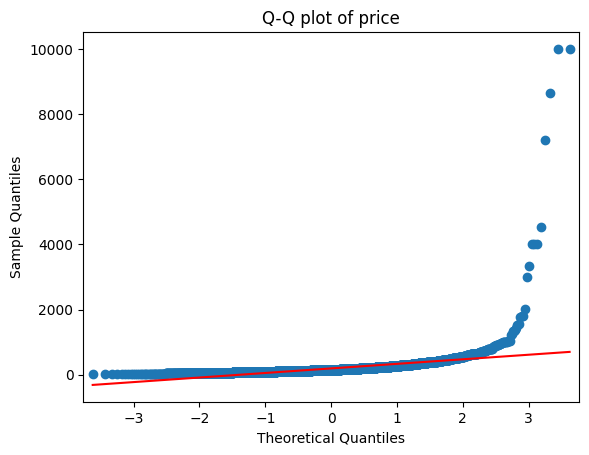

In [107]:
sm.qqplot(df.price,line='r')
plt.title('Q-Q plot of price')

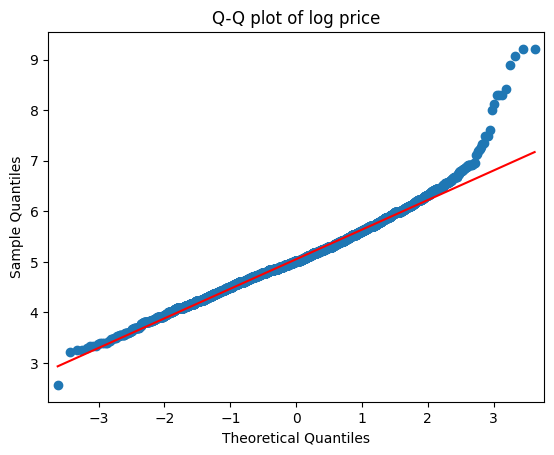

In [108]:
sm.qqplot(df.log_price,line='r')
plt.title('Q-Q plot of log price');

We can see that the while the data is still right skewed after log transformation, it is considerably more normal than the original data. As such, log price will be used as the target variable

**3. Relationship bewteen of log(Price) with Features**

Next, we look at the correlation between price and the other quantative variables. The quantative variables will be grouped according to their categories.

3.1 Property Characteristics

3.1.1 Numerical features

Features that belong to this category are:

accommodates,bedrooms, beds

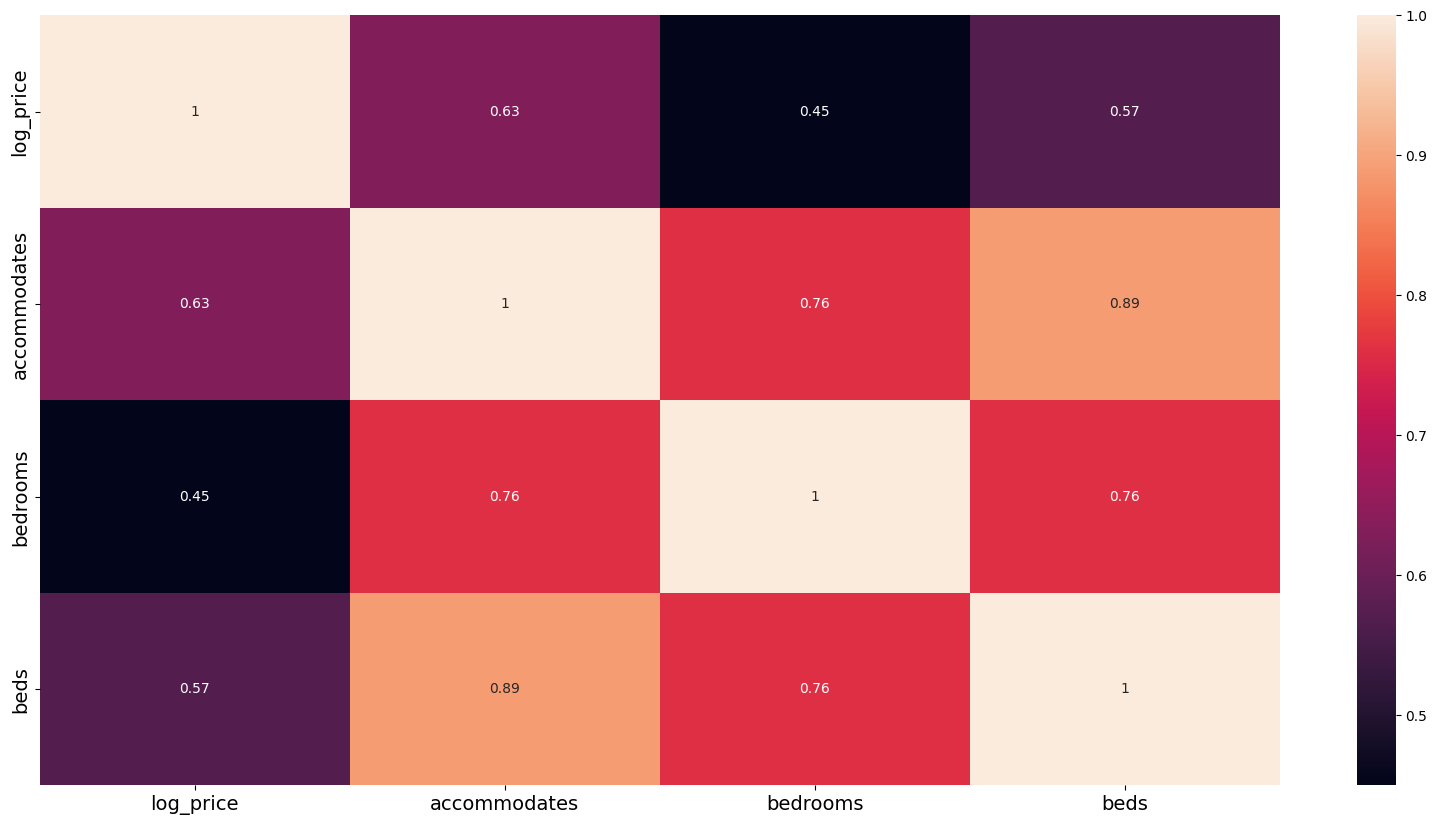

In [109]:
plt.figure(figsize=(20,10))
corr_matrix = df[['log_price','accommodates', 'bedrooms', 'beds']].corr().round(2)
sns.heatmap(corr_matrix, annot=True)
plt.tick_params(labelsize=14);

All three features are correlated with log price. Also, accommodates, bedrooms, and number of beds are highly correlated as expected. The number of bathrooms are also correlated with the other features.

**3.1.2 Categorical Features**

The categorical features under consideration, namely `property_type`, `room_type`, and `bed_type`, exhibit a non-normal distribution in log-transformed price values. To assess the significance of these features in predicting prices, two distinct statistical tests are employed based on the nature of the response categories.

For binary response categories (e.g., 1/0 or true/false), the Mann Whitney U (MWU) test is utilized. Conversely, for features with multi-category responses, the Kruskal-Wallis (KW) test is applied. Both tests aim to ascertain whether samples from different categories are drawn from the same underlying population. A rejection of this null hypothesis implies the potential utility of the feature in predicting prices.

It is essential to note that a minimum sample size criterion must be met for each test. Specifically, the Mann Whitney U test requires a sample size greater than 20 for each category, while the Kruskal-Wallis test necessitates a sample size exceeding 5 for each category.

Reference: Mann Whitney U Test, Kruskal-Wallis H Test

Prior to the analysis, two feature engineering steps are executed for the `property_type` feature:

1. Considering that a bungalow is fundamentally a type of house, all instances labeled as 'Bungalow' are reassigned to the 'House' category.
2. The primary categories of interest are House, Apartment, and Condominium; all other categories are consolidated under the 'Other' category.

In [110]:
df.loc[df.property_type == 'Entire guest suite','property_type'] = 'Entire guesthouse'
df['property_type_simple'] = df.property_type.apply(lambda x: 'Other' if x not in ['Entire home','Entire rental unit','Private room in home','Entire guesthouse','Entire condo','Entire townhouse'] else x)

In [111]:
def pop_eval(feature_list,threshold = 20):

    for feature in feature_list:
        filter_ = (df[feature].value_counts() > threshold)
        data_list = []
        var_str = ""
        cat_list = df[feature].value_counts()[filter_].index
        for i, cat in enumerate(cat_list):
            data_list.append(list(df.loc[df[feature] == cat, 'log_price'].values))
            var_str = var_str + 'data_list' + "[" + str(i) + "]" + ", "
        var_str = var_str[:-2]
        if len(cat_list) > 2:
            s, p = eval('kruskal(' + var_str + ')')
        elif len(cat_list) == 2:
            s, p = eval('mannwhitneyu('+ var_str + ')')

        print(f'Feature: {feature}')
        print(f'Categories: {list(cat_list)}')
        if len(cat_list) ==1:
            print(f'Only one category has count above the threshold of {threshold}. No test was performed.')
            break
        if len(cat_list) > 2:
            print('Test: Kruskal-Wallis Test')
        elif len(cat_list) == 2:
            print('Test: Mann Whitney U Test')
        print(f'The test statistics is {s} and the p-value is {p}.')
        if p < 0.05:
            print('Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.')
        else:
            print('Null hypothesis NOT rejected. There is not significant evidence the samples are not from the same distribution.')
        print('\n')

In [112]:
pop_eval(['property_type_simple', 'room_type'])

Feature: property_type_simple
Categories: ['Entire home', 'Entire rental unit', 'Entire guesthouse', 'Other', 'Private room in home', 'Entire condo', 'Entire townhouse']
Test: Kruskal-Wallis Test
The test statistics is 2431.7385463609403 and the p-value is 0.0.
Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.


Feature: room_type
Categories: ['Entire home/apt', 'Private room']
Test: Mann Whitney U Test
The test statistics is 5211281.5 and the p-value is 3.20252623170845e-281.
Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.




In [113]:
df.head(2)

,id,scrape_id,last_scraped,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities_ na refrigerator,amenities_ ge stainless steel oven,amenities_ i use only organic body products for my guests. they vary but i like dr. teals body soap,amenities_ 42\ tv with hbo max,amenities_ 49\ hdtv with amazon prime video,days_sincehost_since,days_sincefirst_review,days_sincelast_review,log_price,property_type_simple
0,6606,20230918050357,2023-09-18,14942,2009-04-26,within a day,1.0,0.45,False,4,...,0,0,0,0,0,5258,5176,44,4.595120,Entire guesthouse
1,9419,20230918050357,2023-09-18,30559,2009-08-09,within a few hours,1.0,0.99,True,9,...,0,0,0,0,0,5153,4798,14,4.442651,Other


**3.2 Booking policy**

**3.2.1 Numerical Features**

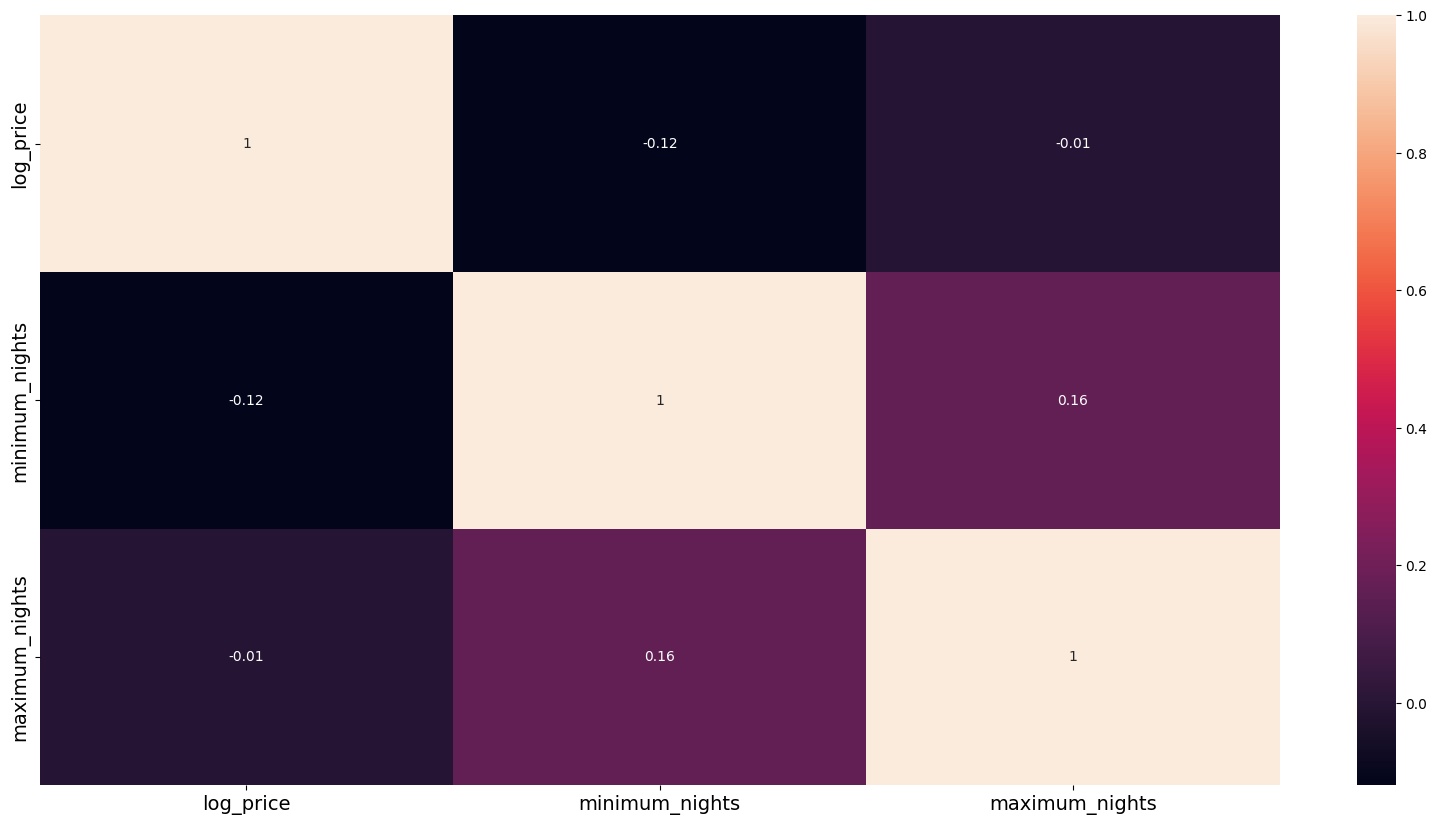

In [114]:
plt.figure(figsize=(20,10))
corr_matrix = df[['log_price','minimum_nights', 'maximum_nights']].corr().round(2)
sns.heatmap(corr_matrix, annot=True)
plt.tick_params(labelsize=14);

**3.2.2 Categorical Features**

In [115]:
pop_eval(['instant_bookable'])

Feature: instant_bookable
Categories: [False, True]
Test: Mann Whitney U Test
The test statistics is 4200016.5 and the p-value is 3.0550439898066096e-11.
Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.




**3.3 Availability**

Features that belong to this categories are:

availability_30, availability_60, availability_90, availability_365

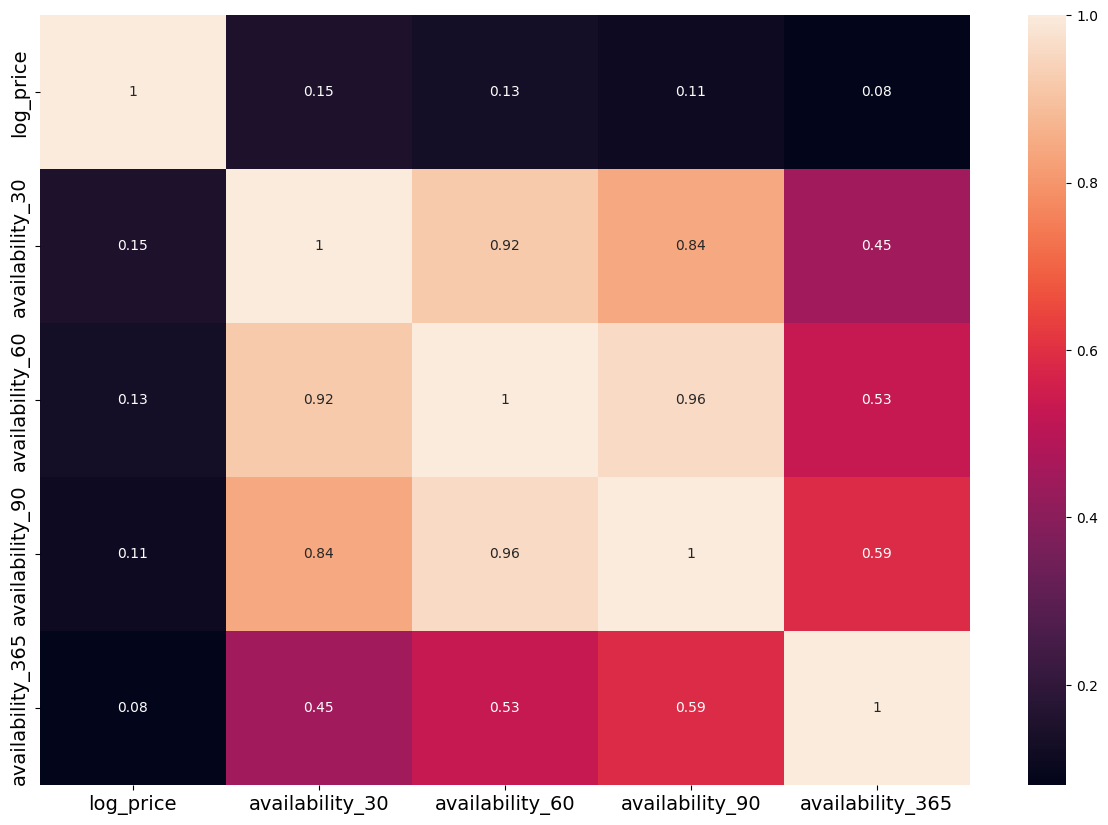

In [116]:
plt.figure(figsize=(15,10))
corr_matrix = df[['log_price','availability_30', 'availability_60', 'availability_90', 'availability_365']].corr().round(2)
sns.heatmap(corr_matrix,annot=True)
plt.tick_params(labelsize=14);

Log price is not correlated with availability. The availability for the various day periods are highly correlated.

**3.4 Review scores rating**

Features that fall into this category are:

review_scores_rating, review_scores_accuracy, review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value

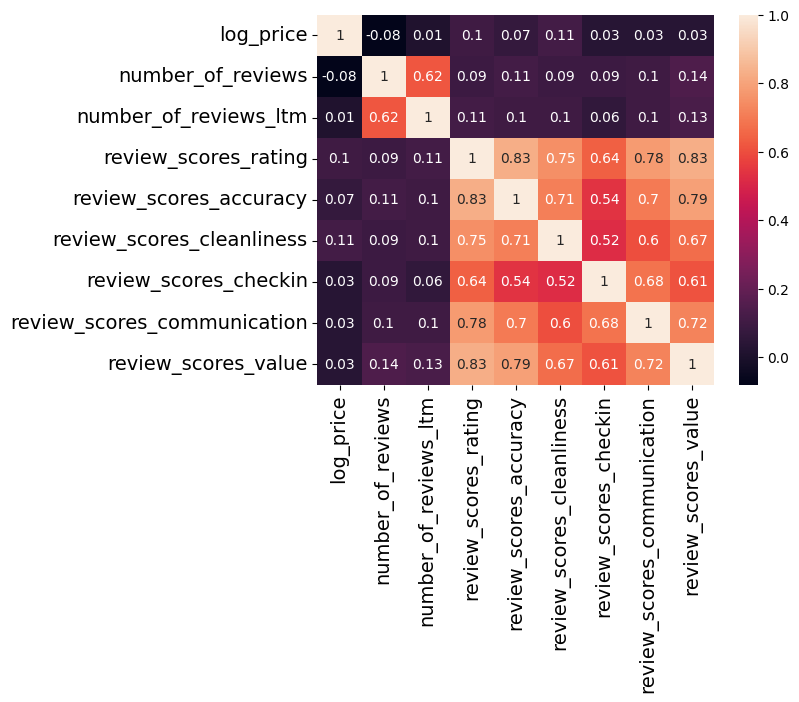

In [117]:
corr_matrix = df[['log_price','number_of_reviews','number_of_reviews_ltm','review_scores_rating', 'review_scores_accuracy',
                  'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                  'review_scores_value']].corr().round(2)
sns.heatmap(corr_matrix,annot=True)
plt.tick_params(labelsize=14);

Log price is not correlated with number of reviews.

Also, interestingly, while the various categories of review scores are highly correlated, log price is not correlated with any of the review score category.

**3.5 Host characteristics**

3.5.1 Numerical features
Features that fall into this category are:

day_since_host_since

<Axes: xlabel='days_sincehost_since', ylabel='log_price'>

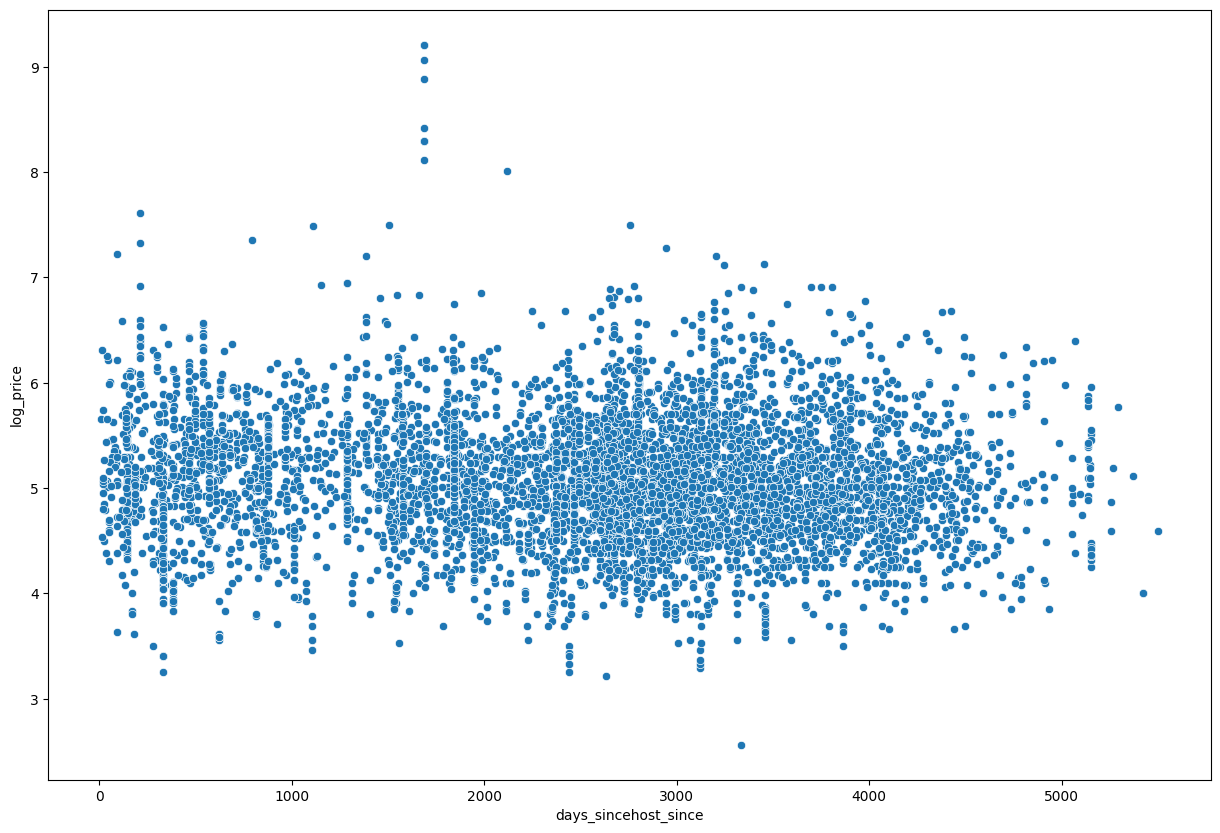

In [118]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='days_sincehost_since',y='log_price')

In [119]:
df[['log_price','days_sincehost_since']].corr().round(2)

,log_price,days_sincehost_since
log_price,1.00,-0.06
days_sincehost_since,-0.06,1.00


There is no correlation between log price and the number of days since the host has become host.

**3.5.2 Categorical Features**


Features that fall into this category are:

host_response_time, host_is_superhost, host_has_profile_pic, host_identify_verified

In [120]:
pop_eval(['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified'])

Feature: host_response_time
Categories: ['within an hour', 'within a few hours', 'within a day', 'a few days or more']
Test: Kruskal-Wallis Test
The test statistics is 98.41779274395839 and the p-value is 3.401512831262046e-21.
Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.


Feature: host_is_superhost
Categories: [False, True]
Test: Mann Whitney U Test
The test statistics is 5470989.0 and the p-value is 0.00011402984992489299.
Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.


Feature: host_has_profile_pic
Categories: [True, False]
Test: Mann Whitney U Test
The test statistics is 267563.5 and the p-value is 0.5112645558570219.
Null hypothesis NOT rejected. There is not significant evidence the samples are not from the same distribution.


Feature: host_identity_verified
Categories: [True, False]
Test: Mann Whitney U Test
The test statistics is 2004096.0 and the p-val

It is interesting to see that the log price are not from the same population for all of the above features.

3.6 Amenities
Overall, 196 distinct amenities are included in all the listings. For this analysis, we will choose the amenities that are not too rare or too common. Thresholds between 30% and 70% are chosen; i.e. amenities that are present between 30% and 70% of listings are chosen.

In [121]:
amenities_list = [x for x in df.columns if 'amenities' in x]
lower = df.shape[0] * 0.3
upper = df.shape[0] * 0.7
filter_ = (df[amenities_list].sum() <=  upper) & (df[amenities_list].sum() >=  lower)
amenities_test = df[amenities_list].sum()[filter_].index

The amenities that are included in the list are:

In [122]:
print(list(amenities_test))

['amenities_ bathtub', 'amenities_ free dryer \\u2013 in unit', 'amenities_ private entrance', 'amenities_ free street parking', 'amenities_ shower gel', 'amenities_ oven', 'amenities_ room-darkening shades', 'amenities_ washer', 'amenities_ freezer', 'amenities_ body soap', 'amenities_ shampoo', 'amenities_ hot water kettle', 'amenities_ long term stays allowed', 'amenities_ outdoor dining area', 'amenities_ wine glasses', 'amenities_ coffee', 'amenities_ baking sheet', 'amenities_ security cameras on property', 'amenities_ conditioner', 'amenities_ stove', 'amenities_ coffee maker', 'amenities_ tv', 'amenities_ toaster', 'amenities_ dishwasher', 'amenities_ heating', 'amenities_[extra pillows and blankets', 'amenities_ portable fans', 'amenities_ cleaning products', 'amenities_ dedicated workspace', 'amenities_ first aid kit', 'amenities_ outdoor furniture', 'amenities_ free parking on premises', 'amenities_ keypad', 'amenities_ luggage dropoff allowed', 'amenities_ dining table']


In [123]:
pop_eval(amenities_test)

Feature: amenities_ bathtub
Categories: [1, 0]
Test: Mann Whitney U Test
The test statistics is 7432885.0 and the p-value is 2.285435968693671e-88.
Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.


Feature: amenities_ free dryer \u2013 in unit
Categories: [0, 1]
Test: Mann Whitney U Test
The test statistics is 3473315.5 and the p-value is 1.2869263929626286e-99.
Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.


Feature: amenities_ private entrance
Categories: [1, 0]
Test: Mann Whitney U Test
The test statistics is 6074270.5 and the p-value is 2.8680437041092996e-22.
Null hypothesis rejected. There is significant evidence the not all samples are from the same distribution.


Feature: amenities_ free street parking
Categories: [1, 0]
Test: Mann Whitney U Test
The test statistics is 5278466.0 and the p-value is 1.6083999588907983e-06.
Null hypothesis rejected. There is s

<Axes: >

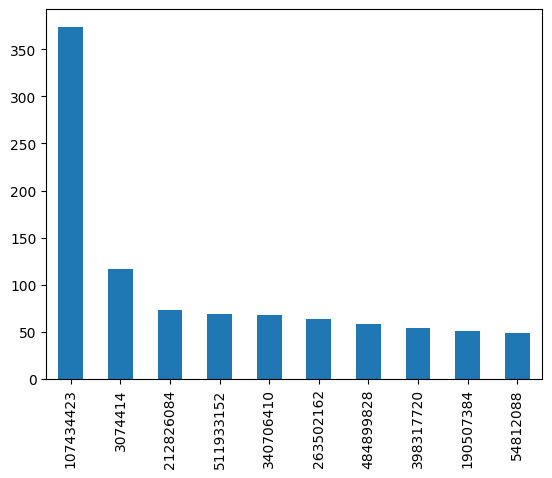

In [124]:
#Top 10 hosts/owners with the most properties througout the city
df.host_id.value_counts().head(10).plot(kind='bar')

The above bar chart shows the hosts with most rooms/properties in the city. It is made by using bar plot in pyplot on value counts method on host_id column.

In [125]:
#roomProperty_DF = df.groupby(['property_type','room_type']).price.mean()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


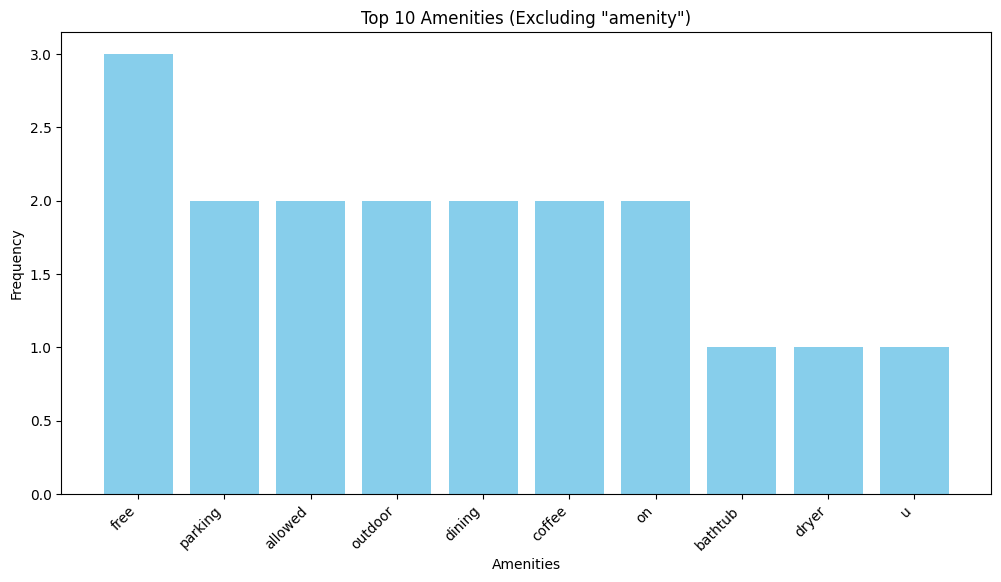

In [126]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from collections import Counter

# Download 'punkt' and 'wordnet' resources
nltk.download('punkt')
nltk.download('wordnet')

# Join the list of amenities into a single string
all_amenities_text = ' '.join(amenities_test)

# Use a regular expression to remove non-alphabetic characters
cleaned_amenities = re.sub('[^a-zA-Z]+', ' ', all_amenities_text)

# Tokenize the cleaned amenities
tokenized_amenities = word_tokenize(cleaned_amenities)

# Lemmatize the tokenized amenities
wnl = WordNetLemmatizer()
lemmatized_amenities = [wnl.lemmatize(word) for word in tokenized_amenities]

# Remove the word 'amenity' from the list
lemmatized_amenities = [word for word in lemmatized_amenities if word != 'amenity']

# Count the frequency of each lemmatized amenity
amenity_counts = Counter(lemmatized_amenities)

# Plot the top N amenities
top_n = 10  # You can adjust this value based on your preferences
top_amenities = amenity_counts.most_common(top_n)

# Extracting labels and counts for plotting
labels, counts = zip(*top_amenities)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Amenities')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Amenities (Excluding "amenity")')
plt.xticks(rotation=45, ha='right')
plt.show()


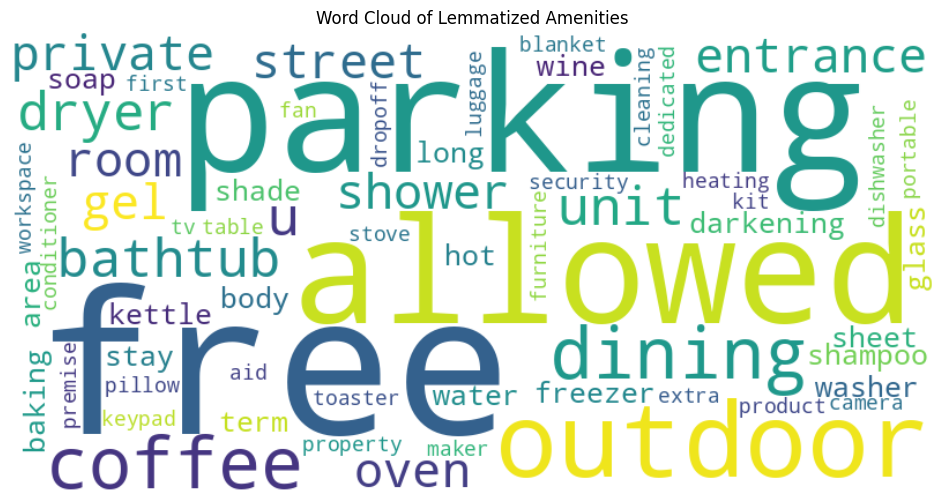

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the list of lemmatized amenities into a single string
text = ' '.join(lemmatized_amenities)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lemmatized Amenities')
plt.show()


In light of the gathered information, the next procedural steps involve the following:

1. **Creation of Dummy or Indicator Features for Categorical Variables:**
   - Dummy or indicator features will be generated for categorical variables, facilitating the integration of categorical information into the subsequent analytical models. This transformation ensures that the categorical nature of certain features is adequately represented in the dataset.

2. **Standardization of the Magnitude of Numeric Features using a Scaler:**
   - A scaler will be employed to standardize the magnitude of numeric features. This normalization process ensures uniformity in the scale of numeric variables, preventing undue influence from features with larger magnitudes during model training and analysis.

3. **Data Splitting into Testing and Training Datasets:**
   - The dataset will be partitioned into distinct testing and training subsets. This segregation is a pivotal preparatory step for subsequent analyses, facilitating model development and evaluation in a robust manner.

These sequential operations will be executed in the forthcoming notebook, as this approach is not only more discerning but also optimally streamlined for ease of implementation.

# 4. Conclusions

In this analysis, various statistical methods were employed to assess the dataset. Key findings and conclusions include:

## Price Distribution and Transformation

- The price distribution exhibits a highly right-skewed pattern, primarily influenced by outliers with exceptionally high prices.
- Applying a log transformation to the price variable helps mitigate the right-skewness, making the distribution appear more normal.

## Correlation with Log Price

The following numerical features show significant correlation with the log-transformed price:

- accommodates
- bedroom
- beds

## Predictive Categorical Features for Log Price

Several categorical features are identified as potentially useful for predicting log price:

- property type
- room type
- bed type
- city
- instant bookable
- host response time
- host identity verified

## Amenities Impacting Log Price

Certain amenities have a notable impact on log price. Noteworthy amenities include:
-free
- fire extinguisher
- microwave
- private entrance
- free parking on premises
- gym
- lock on bedroom door
- long term stays allowed
- self check-in
- oven
- bed linens
- hot water
- elevator
- refrigerator
- family/kid friendly
- dishes and silverware
- stove
- cooking basics
- coffee maker

These findings provide valuable insights for understanding the factors influencing pricing in the dataset and can guide further analysis or modeling efforts.